## Problemstilling


In [1]:
## Import kaggle data

!kaggle datasets download -d danielshanbalico/dog-vs-not-dog

Dataset URL: https://www.kaggle.com/datasets/danielshanbalico/dog-vs-not-dog
License(s): CC0-1.0




  0%|          | 0.00/2.86G [00:00<?, ?B/s]
  0%|          | 1.00M/2.86G [00:00<25:43, 1.99MB/s]
  0%|          | 2.00M/2.86G [00:00<13:57, 3.66MB/s]
  0%|          | 4.00M/2.86G [00:00<07:52, 6.48MB/s]
  0%|          | 5.00M/2.86G [00:00<07:17, 7.01MB/s]
  0%|          | 6.00M/2.86G [00:01<06:41, 7.62MB/s]
  0%|          | 7.00M/2.86G [00:01<06:13, 8.19MB/s]
  0%|          | 8.00M/2.86G [00:01<05:51, 8.70MB/s]
  0%|          | 10.0M/2.86G [00:01<05:05, 10.0MB/s]
  0%|          | 11.0M/2.86G [00:01<05:02, 10.1MB/s]
  0%|          | 13.0M/2.86G [00:01<04:43, 10.8MB/s]
  1%|          | 15.0M/2.86G [00:01<04:39, 10.9MB/s]
  1%|          | 17.0M/2.86G [00:02<04:35, 11.1MB/s]
  1%|          | 19.0M/2.86G [00:02<04:35, 11.1MB/s]
  1%|          | 21.0M/2.86G [00:02<04:43, 10.8MB/s]
  1%|          | 23.0M/2.86G [00:02<04:41, 10.8MB/s]
  1%|          | 25.0M/2.86G [00:02<04:31, 11.2MB/s]
  1%|          | 27.0M/2.86G [00:03<04:40, 10.8MB/s]
  1%|          | 29.0M/2.86G [00:03<04:36, 11.0MB/s]
 

In [18]:
## Structure data and scale it 
from PIL import Image  # Assuming Pillow for image processing
import csv
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint

data_path = 'dog-vs-not-dog/'

# remove labels.csv because it's not a class
class_names = sorted(os.listdir(data_path))
class_names.remove('labels.csv')
num_classes = len(class_names)

img_size = (96, 96, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


images = []
labels = []
labels_df = pd.read_csv('dog-vs-not-dog/labels.csv')

print('\n\nlabels dataframe: \n', labels_df.head())

for index, row in labels_df.iterrows():
    image_path = data_path + row[2] + '/' + row[1]
    image = Image.open(image_path).convert('RGB')  # Open and convert to RGB
    image = np.asarray(image.resize(img_size[0:2]))  # Resize to desired size
    images.append(np.asarray(image))

    label = np.zeros(num_classes)
    label[class_names.index(row[2])] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



2 classes: ['dog', 'other']
image size: (96, 96, 3)


labels dataframe: 
    Unnamed: 0                                 filename  label
0           0   QYjQz1LS7dATFSYYRfnOfk6ezX8Gp49589.jpg  other
1           1   rltnrLmjyQgZnuSpbTKjPrm24wjHL43876.jpg  other
2           2  LNZNJPLSMhZAo8siLJlLVdHoxCTU5T11617.jpg  other
3           3   5ghe8eSnGWzfpowvy0oeLnqkEPqYbO8045.jpg  other
4           4  2V3zbjyoxmG3zKDyxTpN2GpEvVolj811765.jpg    dog


C:\Users\mariu\AppData\Local\Temp\ipykernel_19644\671261442.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = data_path + row[2] + '/' + row[1]
C:\Users\mariu\AppData\Local\Temp\ipykernel_19644\671261442.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[class_names.index(row[2])] = 1



labels shape: (25124, 2)
images shape: (25124, 96, 96, 3)


79/79 [==============================] - 44s 549ms/step - loss: 0.2825 - accuracy: 0.8790
Test mean accuracy 0.8790290355682373
Test mean loss 0.2825120687484741


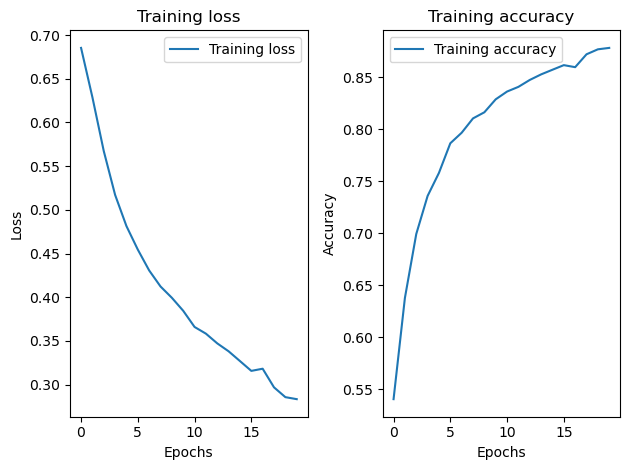

In [19]:
## Create the model and fit/test it
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from sklearn.model_selection import train_test_split

class CNNModel(keras.callbacks.Callback):
    def __init__(self) -> None:
        # Gemini code
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

        self.epoch_loss = None
        self.epoch_accuracy = None
        self.training_loss = None
        self.training_accuracy = None

    def createModel(self):
        cnn_model = tf.keras.Sequential()

        # Inputs and rescaling
        cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))
        
        # Convolutional block 1
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Convolutional block 2
        cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Convolutional block 3
        cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        
        # Dense block
        cnn_model.add(tf.keras.layers.Dense(512, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
        cnn_model.add(tf.keras.layers.Dropout(rate=0.2))
        cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


        cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return cnn_model

    def train_and_test_model(self):
        cnn_model = self.createModel()
        self.epoch_loss = []
        self.epoch_accuracy = []
        self.training_loss = []
        self.training_accuracy = []
        
        # Gemini code
        for epoch in range(1, 21):
            modelHistory = cnn_model.fit(self.x_train, self.y_train, epochs=1, batch_size=16, verbose=1)
        
            self.epoch_loss.append(modelHistory.history['loss'][0])
            self.epoch_accuracy.append(modelHistory.history['accuracy'][0])
                
                
        self.training_loss.append(self.epoch_loss)
        self.training_accuracy.append(self.epoch_accuracy)
        
        test_loss, test_acc = cnn_model.evaluate(self.x_test, self.y_test)
        print("Test mean accuracy", np.mean(test_acc))
        print("Test mean loss", np.mean(test_loss))

    
    # Code-structure from stack overflow
    def plotTrainingData(self):
        plt.subplot(1,2,1)
        plt.plot(np.mean(self.training_loss, axis=0), label="Training loss")
        plt.title("Training loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(np.mean(self.training_accuracy, axis=0), label="Training accuracy")
        plt.title("Training accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.tight_layout()
        plt.show()

newCnn = CNNModel()

newCnn.train_and_test_model()
newCnn.plotTrainingData()
